#**Preprocessing & Data Examination**

In [1]:
# Import necessary packages / libraries
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import unicodedata
!pip install contractions
import contractions
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
import warnings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing
warnings.filterwarnings('ignore')
nltk.download('wordnet')
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.6 MB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Get data from Tweet dataset. This dataset has been manually categorized by human contributors according to the author.

# Getting data from link (option in case the user does not have the file)
# df = pd.read_csv('/kaggle/input/emotion-detection-from-text/tweet_emotions.csv')



Data = pd.read_csv('tweet_emotions.csv')
print(Data.head())

     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...


In [6]:
# Dataframe
df = pd.DataFrame(Data)

In [31]:
# Count and percentage of each emotion
frequency_counts = df['sentiment'].value_counts()

frequency_percentage = (frequency_counts / len(df['sentiment'])) * 100
frequency_df = pd.DataFrame({'Counts': frequency_counts, 'Percentage': frequency_percentage})

print(frequency_df)

# Print frequency and percentage for each unique category in the dataset
cardinality = df['sentiment'].nunique()
print(f"\ntotal categories: {cardinality}")

# Check for statistical significance (do not count categories under 30 responses).
for i in frequency_counts:
  if i < 31:
    print("Not significant as responses are less than 30")


            Counts  Percentage
neutral       8638     21.5950
worry         8459     21.1475
happiness     5209     13.0225
sadness       5165     12.9125
love          3842      9.6050
surprise      2187      5.4675
fun           1776      4.4400
relief        1526      3.8150
hate          1323      3.3075
empty          827      2.0675
enthusiasm     759      1.8975
boredom        179      0.4475
anger          110      0.2750

total categories: 13


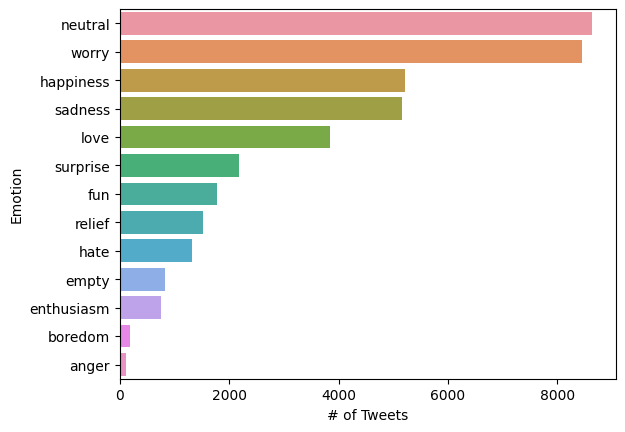

In [32]:
# Using seaborn to display a graph of category counts

# Sorted category frequencies in order to display bar graph in descending order
cat_freq = df['sentiment'].value_counts()
ordered_cat_freq = cat_freq.index

# Create a bar graph to display the results. The bar graph is horizontal for best readability
sns.barplot(x = cat_freq.values,
            y = ordered_cat_freq)
plt.xlabel('# of Tweets')
plt.ylabel('Emotion')
plt.show()

In [16]:
# Normalize Process

# Cleaning and lemmatising

X = df['content']
cleaned = []

for sen in range(0, len(X)):
    # Remove all the special characters (any letter or a digit)
    document = re.sub(r'\W', ' ', str(X[sen]))

    # Remove all single characters (surrounded by whitespace)
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization- splits into list of words ['The', 'quick', ....]
    document = document.split()

    lemma = WordNetLemmatizer()
    document = [lemma.lemmatize(word) for word in document]
    document = ' '.join(document)
    cleaned.append(document)

# Print document output
document

'mopedronin bullet train from tokyo the gf and have been visiting japan since thursday vacation sightseeing gaijin godzilla'

#**Model**

In [17]:
# Set variables (content of tweets and the sentiment/emotion it is categorized as)
X = np.array(df['content'])
y = np.array(df['sentiment'])

# Convert the sentiments into numbers in order to normalize labels
Label_Encoder = preprocessing.LabelEncoder()
y = Label_Encoder.fit_transform(y)

In [18]:
# Create a vector
vec = CountVectorizer()
X = vec.fit_transform(X)


In [19]:
# Import train_test_split. After struggling to get numpy to work, I found this solution online.
from sklearn.model_selection import train_test_split

# Train the model on the given data. random_state value is 42, as it is arbitrary but commonly used value.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [21]:
# After looking through the SKLEARN forums, I found this libray. Doing the model manually raised RAM errors. According to online sources, the dataset is too large.
# Link to the website for citation (to avoid plagarism) - https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MNB_Predictions = MNB.predict(X_test)

# Get statistic data
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, MNB_Predictions, average='weighted')
recall = recall_score(y_test, MNB_Predictions, average='weighted')
f1 = f1_score(y_test, MNB_Predictions, average='weighted')
accuracy = accuracy_score(y_test, MNB_Predictions)

from tabulate import tabulate   # Import library as the display was too difficult to read

# Format results into a table for readability
metric_data_table = [["Metric", "Score"],
              ["Precision", precision],
              ["Recall", recall],
              ["F1-score", f1],
              ["Accuracy", accuracy]]


print(tabulate(metric_data_table, headers="firstrow", tablefmt="fancy_grid"))


╒═══════════╤══════════╕
│ Metric    │    Score │
╞═══════════╪══════════╡
│ Precision │ 0.286015 │
├───────────┼──────────┤
│ Recall    │ 0.307875 │
├───────────┼──────────┤
│ F1-score  │ 0.253573 │
├───────────┼──────────┤
│ Accuracy  │ 0.307875 │
╘═══════════╧══════════╛


In [22]:
# Display accuracy score against desired result

print("Desired Accuracy: 50.00 %")
print("Current Accuracy: ", accuracy * 100, "%")
print("Difference: ", 50 - (accuracy * 100), "%")


Desired Accuracy: 50.00 %
Current Accuracy:  30.7875 %
Difference:  19.2125 %


##Potential Issues##

1. As the majority of responses are neutral, this could bias the model and affect accuracy.
2. The report must include a disclaimer stating the unbalanced counts and any categories that are not significant
3. Some of the Tweets might have characters that were missed in the lemmatization process, however, there are too many to manually go through.

##Steps:##
1. Test the model by using a confusion matrix. This allows me to see which positives and negatives were true and/or false, better identifying any issues in the program.

In [40]:
# Import the necessary libraries
from sklearn.metrics import confusion_matrix, classification_report

sentiments = df['sentiment'].unique()   # It was confusing without the labels, so I pulled them out


# Confusion Matrix
confusion_mat = confusion_matrix(y_test, MNB_Predictions)   # Create the confusion matrix
print("Confusion Matrix - Sentiment: ")
print(pd.DataFrame(confusion_mat, columns = sentiments, index = sentiments))    # Print it out with the labels for readability


Confusion Matrix - Sentiment: 
            empty  sadness  enthusiasm  neutral  worry  surprise  love  fun  \
empty           0        0           0        0      0         0     0    0   
sadness         0        0           0        0      0         0     0    0   
enthusiasm      0        0           0        1      0        12     0    3   
neutral         0        0           0        0      0        18     0    4   
worry           0        0           0        0      0        60     0   18   
surprise        0        0           0        0      2       295     0   77   
love            0        0           0        0      0         4     4    0   
fun             0        0           0        0      0       143     0  212   
hate            0        0           3        1      2       142     0   45   
happiness       0        0           0        0      0        50     0   11   
boredom         0        0           0        0      0        20     0   12   
relief          0    

##Results:##
* Using the confusion matrix, we can see that the first 4 categories performed poorly.
* Notably, the program stuggled most with subjective classifications such as hate versus anger. While these are different, they share characteristics and could be reasonably mistaken.



In [42]:
# Classification Report for additional clarification
classification_rep = classification_report(y_test, MNB_Predictions, target_names = sentiments)   # Create the report. target_names was taken from GeekforGeek.
print("Classification Report - Sentiment:")
print(classification_rep)

Classification Report - Sentiment:
              precision    recall  f1-score   support

       empty       0.00      0.00      0.00        19
     sadness       0.00      0.00      0.00        31
  enthusiasm       0.00      0.00      0.00       162
     neutral       0.00      0.00      0.00       163
       worry       0.00      0.00      0.00       338
    surprise       0.34      0.29      0.31      1028
        love       0.57      0.01      0.03       268
         fun       0.50      0.28      0.36       762
        hate       0.34      0.35      0.35      1740
   happiness       0.00      0.00      0.00       352
     boredom       0.31      0.10      0.15      1046
      relief       0.07      0.00      0.00       425
       anger       0.27      0.74      0.40      1666

    accuracy                           0.31      8000
   macro avg       0.19      0.14      0.12      8000
weighted avg       0.29      0.31      0.25      8000



##Results:##
* Using the classification report, we can see that once again, the same categories are performing poorly. Namely: empty, sadness, enthusiasm, nuetral, worry, and happiness.
* The model is performing strongly on love, relief, surprise, fun, and hate.

##Steps:##
* I found a few potential fixes for these issues. One was addressing potential class imbalances we saw above.
* Another fix was to adjust either the weight or the evaluation method
* We could consider judging the model's success on another metric other than accuracy, as some categories show an improve score in other metrics.

